# Introduction

In this Project, we want to investigate the danish pension contributions across the regions.

We will fetch data Statistics Denmark. The datasets used are:
* PENINDB1
* INDAMP01

**Import of needed packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2 # install with pip install matplotlib-venn
import pandas_datareader # install with `pip install pandas-datareader`
import pydst # install with `pip install git+https://github.com/elben10/pydst`
dst = pydst.Dst(lang='en') # # setup data loader with the langauge 'english' 

# Read and clean data

## Pension data

**Read the pension data from an API and clean it by removing and renaming columns:**

Consider the following dictionary definitions:

In [2]:
columns_dict = {}
columns_dict['OMRÅDE'] = 'region'
columns_dict['ENHED'] = 'unit'
columns_dict['KOEN'] = 'sex'
columns_dict['ALDER1'] = 'age'
columns_dict['PENTYP'] = 'pensiontype'
columns_dict['TID'] = 'time'
columns_dict['INDHOLD'] = 'content'
columns_dict['BNØGLE'] = 'key_pop'
columns_dict['PERSG'] = 'group_of_person'
columns_dict['ALDER'] = 'age'
columns_dict['KØN'] = 'sex'

This dictionary will be used in order to translate the column names into english.

We get an overview of the subjects from Statistics Denmark.

In [3]:
dst.get_subjects()

,id,desc,active,hasSubjects
0,02,Population and elections,True,True
1,04,"Labour, income and wealth",True,True
2,06,Prices and consumption,True,True
3,05,Living conditions,True,True
4,14,National accounts and government finances,True,True
5,03,Education and knowledge,True,True
6,11,Business sectors,True,True
7,07,Business sector in general,True,True
8,16,Money and credit market,True,True
9,13,External economy,True,True


Have a further look into the subject "Labour, income and wealth"

In [4]:
tables = dst.get_tables(subjects=['04'])
tables

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,AKU100K,Seasonally adjusted labour force status,"1,000 people",2021-02-17 08:00:00,2008Q1,2020Q4,True,"[employment status, time]"
1,AKU101K,Seasonally adjusted labour force status in per...,per cent,2021-02-17 08:00:00,2008Q1,2020Q4,True,"[employment status, time]"
2,AKU110K,Labour force status,"1,000 people",2021-02-17 08:00:00,2008Q1,2020Q4,True,"[employment status, age, sex, time]"
3,AKU111K,Labour force status in percentage,per cent,2021-02-17 08:00:00,2008Q1,2020Q4,True,"[employment status, age, sex, time]"
4,AKU120K,Labour force status,"1,000 people",2021-02-17 08:00:00,2008Q1,2020Q4,True,"[employment status, region, time]"
...,...,...,...,...,...,...,...,...
239,TJEN01,Accrued civil servant pension for active civil...,-,2020-12-10 08:00:00,2014,2019,True,"[sector, unit, sex, profession, ages groups, t..."
240,TJEN02,Accrued civil servant pension for retired civi...,-,2020-12-10 08:00:00,2014,2019,True,"[sector, unit, sex, time]"
241,PENSOC,Supplementary table for accrued-to-date pensio...,m DKK,2020-12-23 08:00:00,2015,2019,True,"[pension schemes, account, time]"
242,PENS6,Value of pension schemes (except special schem...,-,2020-09-15 08:00:00,2015,2019,True,"[kind of pension, company type, unit, family t..."


We have a look at the dataset "PENINDB1". This dataset has the desired topic we want to investigate.

In [5]:
tables[tables.id == 'PENINDB1']

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
243,PENINDB1,Persons with pension contributions,-,2020-11-19 08:00:00,2005,2019,True,"[region, unit, sex, age, type of pension, time]"


**Variables in the dataset:**

In [6]:
pens_vars = dst.get_variables(table_id='PENINDB1')
pens_vars

,id,text,elimination,time,map,values
0,OMRÅDE,region,True,False,denmark_municipality_07,"[{'id': '000', 'text': 'All Denmark'}, {'id': ..."
1,ENHED,unit,False,False,NaN,"[{'id': '123', 'text': 'People with type of pe..."
2,KOEN,sex,True,False,NaN,"[{'id': 'MOK', 'text': 'Men and women, total'}..."
3,ALDER1,age,True,False,NaN,"[{'id': 'TOT', 'text': 'Age, total'}, {'id': '..."
4,PENTYP,type of pension,False,False,NaN,"[{'id': '20', 'text': 'All with pension scheme..."
5,Tid,time,False,True,NaN,"[{'id': '2005', 'text': '2005'}, {'id': '2006'..."


We run this code to choose the right variables. 

In [7]:
for id in ['ENHED','KOEN','ALDER1','PENTYP','Tid']:
    print(id)
    values = pens_vars.loc[pens_vars.id == id,['values']].values[0,0]
    for value in values:      
        print(f' id = {value["id"]}, text = {value["text"]}')

ENHED
 id = 123, text = People with type of pension (number)
 id = 124, text = Amount of contribution (DKK 1.000)
 id = 125, text = Average contribution for all people (DKK)
 id = 126, text = Average contribution for people with the type of pension (DKK)
KOEN
 id = MOK, text = Men and women, total
 id = M, text = Men
 id = K, text = Women
ALDER1
 id = TOT, text = Age, total
 id = 25UN, text = Under 25 years
 id = 2534, text = 25-34 years
 id = 3544, text = 35-44 years
 id = 4554, text = 45-54 years
 id = 5564, text = 55-64 years
 id = 65-, text = 65 years and over
PENTYP
 id = 20, text = All with pension scheme contributions
 id = 21, text = Contributions for Labour market pensions
 id = 22, text = Contributions for Private pensions
Tid
 id = 2005, text = 2005
 id = 2006, text = 2006
 id = 2007, text = 2007
 id = 2008, text = 2008
 id = 2009, text = 2009
 id = 2010, text = 2010
 id = 2011, text = 2011
 id = 2012, text = 2012
 id = 2013, text = 2013
 id = 2014, text = 2014
 id = 2015, t

In [8]:
# Load the full data set from an API (Denmarks Statistics)
PENINDB1 = dst.get_data(table_id = 'PENINDB1', variables={'OMRÅDE':['*'], 'ENHED':['*'], 'KOEN':['*'], 'ALDER1':['*'], 'PENTYP':['*'], 'Tid':['*']})

# Renaming the columns
PENINDB1.rename(columns = columns_dict, inplace=True)

PENINDB1.head(5)

,region,unit,sex,age,pensiontype,time,content
0,Egedal,Average contribution for people with the type ...,"Men and women, total",Under 25 years,Contributions for Labour market pensions,2005,10679
1,Egedal,Average contribution for people with the type ...,"Men and women, total",25-34 years,Contributions for Labour market pensions,2005,30541
2,Egedal,Average contribution for people with the type ...,"Men and women, total",35-44 years,Contributions for Labour market pensions,2005,42077
3,Egedal,Average contribution for people with the type ...,"Men and women, total",45-54 years,Contributions for Labour market pensions,2005,46057
4,Egedal,Average contribution for people with the type ...,"Men and women, total",55-64 years,Contributions for Labour market pensions,2005,54214


We only want to look at the aggregated pension contributions for all the citizens of denmark and across all ages. 

In [9]:
var_total={'OMRÅDE':['*'], 'ENHED':['124'], 'KOEN':['MOK'], 'ALDER1':['TOT'], 'PENTYP':['20'], 'Tid':['*']}
PENINDB1_total = dst.get_data(table_id = 'PENINDB1', variables = var_total)

# Sort the columns by region, time and sex
PENINDB1_total.sort_values(by = ['OMRÅDE', 'TID', 'KOEN'], inplace = True)

# Renaming the columns
PENINDB1_total.rename(columns = columns_dict, inplace=True)
PENINDB1_total.head(5)

,region,unit,sex,age,pensiontype,time,content
108,Aabenraa,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2005,864447
191,Aabenraa,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2006,1022755
278,Aabenraa,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2007,1064336
395,Aabenraa,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2008,1112842
588,Aabenraa,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2009,1108301


**Remove all rows which are not "Regions" or "All Denmark":**

In [10]:
# Select the variables that contains the words "region" or "Denmark" 
PENINDB1_total_region = PENINDB1_total[PENINDB1_total['region'].str.startswith('Region', na = False) | PENINDB1_total['region'].str.contains('Denmark', na = False)]

PENINDB1_total_region.head(5)

,region,unit,sex,age,pensiontype,time,content
3,All Denmark,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2005,90443951
200,All Denmark,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2006,99782677
288,All Denmark,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2007,108170402
422,All Denmark,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2008,110665934
505,All Denmark,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2009,114671347


# Data Visualization and Analysis

**We plot the development of the pension constributions for Denmark**

Text(0, 0.5, 'All Denmark')

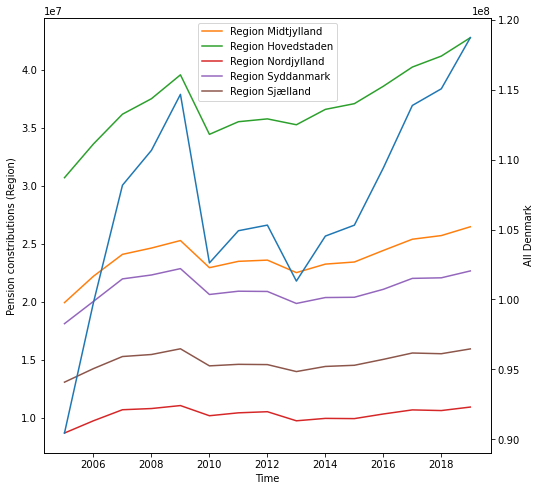

In [11]:
all_denmark = PENINDB1_total_region.loc[PENINDB1_total_region['region'] == 'All Denmark', :]

midtjylland = PENINDB1_total_region.loc[PENINDB1_total_region['region'] == 'Region Midtjylland', :]

hovedstaden = PENINDB1_total_region.loc[PENINDB1_total_region['region'] == 'Region Hovedstaden', :]

nordjylland = PENINDB1_total_region.loc[PENINDB1_total_region['region'] == 'Region Nordjylland', :]

syddanmark = PENINDB1_total_region.loc[PENINDB1_total_region['region'] == 'Region Syddanmark', :]

sjælland = PENINDB1_total_region.loc[PENINDB1_total_region['region'] == 'Region Sjælland', :]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

# Now we are just plotting directly from the pandas dataframe. Still using matplotlib under the hood.
all_denmark.plot(ax = ax, x = 'time', secondary_y = 'content', legend = True)
midtjylland.plot(ax = ax, x = 'time', y = 'content', legend = True)
hovedstaden.plot(ax = ax, x = 'time', y = 'content', legend = True)
nordjylland.plot(ax = ax, x = 'time', y = 'content', legend = True)
syddanmark.plot(ax = ax, x = 'time', y = 'content', legend = True)
sjælland.plot(ax = ax, x = 'time', y = 'content', legend = True)

ax.legend(['Region Midtjylland', 'Region Hovedstaden', 'Region Nordjylland', 'Region Syddanmark', 'Region Sjælland'], frameon = True)
ax.set_xlabel('Time')
ax.set_ylabel('Pension constributions (Region)')
ax.right_ax.set_ylabel('All Denmark')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

We notice that region "Hovedstaden" has the highest pension contributions in total. This is as expected due to biggest region according to population size. All the regions follow the same pattern. The contributions are increasing up to the financial crisis. In the first years after the crisis the contributions are decreasing until the year 2014 where they start to rise again. 

Furthermore we plot an interactice figure of the pension contributions based on the different regions. 

In [12]:
def plot(PENINDB1_total_region, region): 
    I = PENINDB1_total_region['region'] == region
    ax = PENINDB1_total_region.loc[I,:].plot(x = 'time', y = 'content', style = '-o', legend = False)

In [13]:
widgets.interact(plot, 
    PENINDB1_total_region = widgets.fixed(PENINDB1_total_region),
    region = widgets.Dropdown(description = 'Regions', 
                                    options = PENINDB1_total_region.region.unique(), 
                                    value = 'All Denmark')
);

interactive(children=(Dropdown(description='Regions', options=('All Denmark', 'Region Hovedstaden', 'Region Mi…

Now we want to consider the average penison contributions across the regions. This is done by importing a dataset with the content population in the different regions. 

Now we merge the dataset with data for the population in every region

In [14]:
pop_vars = dst.get_variables(table_id='INDAMP01')
pop_vars

,id,text,elimination,time,map,values
0,OMRÅDE,region,True,False,denmark_municipality_07,"[{'id': '000', 'text': 'All Denmark'}, {'id': ..."
1,PERSG,group of persons,True,False,NaN,"[{'id': 'IALT', 'text': 'Total number of perso..."
2,BNØGLE,key figures,False,False,NaN,"[{'id': 'PER', 'text': 'Persons'}, {'id': 'UDS..."
3,ALDER,age,True,False,NaN,"[{'id': 'TOT', 'text': 'Age, total'}, {'id': '..."
4,KØN,sex,True,False,NaN,"[{'id': 'TOT', 'text': 'Total'}, {'id': 'M', '..."
5,Tid,time,False,True,NaN,"[{'id': '2006', 'text': '2006'}, {'id': '2007'..."


In [15]:
var_pop={'OMRÅDE':['*'], 'PERSG':['IALT'], 'BNØGLE':['PER'], 'ALDER':['TOT'], 'KØN':['TOT'], 'Tid':['*']}
INDAMP01 = dst.get_data(table_id = 'INDAMP01', variables = var_pop)

# Renaming the columns
INDAMP01.rename(columns = columns_dict, inplace=True)

# Dropping some variables
drop_these = ['group_of_person', 'key_pop', 'age', 'sex'] # use list comprehension to create list of columns
INDAMP01.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
INDAMP01.head(5)

,region,time,content
0,Holbæk,2011,69521
1,Faxe,2011,35277
2,Kalundborg,2011,49088
3,Ringsted,2011,32890
4,Slagelse,2011,77442


**Now we merge the two data sets:**

In [16]:
merged = pd.merge(PENINDB1_total_region, INDAMP01, how = 'left', on = ['region', 'time'])

# Renaming two columns
merged.rename(columns = {'content_x':'pension_contribution'}, inplace=True)
merged.rename(columns = {'content_y':'population'}, inplace=True)

merged = merged.dropna()

merged.head(5)

,region,unit,sex,age,pensiontype,time,pension_contribution,population
1,All Denmark,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2006,99782677,5427449.0
2,All Denmark,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2007,108170402,5447066.0
3,All Denmark,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2008,110665934,5475791.0
4,All Denmark,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2009,114671347,5511451.0
5,All Denmark,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2010,102613708,5534738.0


**Now we compute a new variable which is the average contribution:**

In [17]:
merged['average_pension'] = merged['pension_contribution'] / merged['population']
merged.head(15)

,region,unit,sex,age,pensiontype,time,pension_contribution,population,average_pension
1,All Denmark,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2006,99782677,5427449.0,18.384821
2,All Denmark,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2007,108170402,5447066.0,19.858471
3,All Denmark,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2008,110665934,5475791.0,20.210036
4,All Denmark,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2009,114671347,5511451.0,20.806018
5,All Denmark,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2010,102613708,5534738.0,18.539940
6,All Denmark,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2011,104916154,5560628.0,18.867681
7,All Denmark,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2012,105317705,5580516.0,18.872395
8,All Denmark,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2013,101312865,5602628.0,18.083097
9,All Denmark,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2014,104533113,5627235.0,18.576284
10,All Denmark,Amount of contribution (DKK 1.000),"Men and women, total","Age, total",All with pension scheme contributions,2015,105313086,5659715.0,18.607489


In [18]:
def plot_new(merged, region): 
    I = merged['region'] == region
    ax = merged.loc[I,:].plot(x = 'time', y = 'average_pension', style = '-o', legend = False)

In [19]:
widgets.interact(plot_new, 
    merged = widgets.fixed(merged),
    region = widgets.Dropdown(description = 'Regions', 
                                    options = merged.region.unique(), 
                                    value = 'All Denmark')
);

interactive(children=(Dropdown(description='Regions', options=('All Denmark', 'Region Hovedstaden', 'Region Mi…

We see that the average of pension contributions per person in 2018 in denmark is 19.904 dkk. The highest amount of average pension contributions was in 2009 with a value of 20.806 dkk. The region "Hovedstaden" is always above national average. This indicates that this region is the most wealthiest. 

# Conclusion

In this short analysis we have investigated danish pension contributions, and we have found that the contributions across regions follows the same pattern, but are very much affected by the financial crisis in 2008. To further investigate contributions one could sort the data by gender and age.